In [3]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

#### Import data set into dataframe

In [6]:
# Import S&P data set from the excel file
import zipfile
import pandas as pd

zip_path = r"C:\Users\georg\Downloads\SP500 options all series all expirations fromm 1996_csv.zip"
file_name = "ajjczlf8wdedmsa5.csv"

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open(file_name) as f:
        df = pd.read_csv(f)

print(df.head())

    secid        date    symbol  symbol_flag      exdate   last_date cp_flag  \
0  108105  04/01/1996  098D6.C9            0  17/02/1996         NaN       C   
1  108105  04/01/1996  09C49.C1            0  16/03/1996         NaN       P   
2  108105  04/01/1996  09B4B.56            0  20/01/1996  04/01/1996       P   
3  108105  04/01/1996  098E1.23            0  22/06/1996         NaN       C   
4  108105  04/01/1996  09B4C.F9            0  16/03/1996  04/01/1996       C   

   strike_price  best_bid  best_offer  ...   sic  index_flag  exchange_d  \
0        570000   48.2500     49.2500  ...  9999           1       32768   
1        550000    1.1875      1.3125  ...  9999           1       32768   
2        525000    0.0000      0.1250  ...  9999           1       32768   
3        595000   38.5000     39.5000  ...  9999           1       32768   
4        625000    9.1250      9.8750  ...  9999           1       32768   

   class  issue_type  industry_group              issuer  div_

In [8]:
# Create sub data frame with only columns that interest us (we might add more in case it is needed)
import gc  
df_sub = df[["date", "exdate", "cp_flag", "strike_price", "best_bid", "best_offer", "impl_volatility", "delta", "gamma", "vega", "theta"]].copy()
# Delete df to free up memory  
del df  
# Run garbage collection  
gc.collect()

477

In [10]:
# Print the sub data frame
df_sub.head()

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta
0,04/01/1996,17/02/1996,C,570000,48.2500,49.2500,NaN,NaN,NaN,NaN,NaN
1,04/01/1996,16/03/1996,P,550000,1.1875,1.3125,0.181884,-0.057566,0.002341,31.161770,-13.584810
2,04/01/1996,20/01/1996,P,525000,0.0000,0.1250,0.328031,-0.004897,0.000358,1.717098,-7.240195
3,04/01/1996,22/06/1996,C,595000,38.5000,39.5000,0.125173,0.732626,0.006102,134.141600,-29.716260
4,04/01/1996,16/03/1996,C,625000,9.1250,9.8750,0.103697,0.456910,0.014081,106.843300,-37.256020


In [12]:
# Divide strike price by 1000 
df_sub.strike_price = df_sub.strike_price/1000 

In [14]:
# Turn strike price to float
df_sub["strike_price"] = df_sub["strike_price"].astype(float)

### Import S&P spot data from 2015 till 2025

In [17]:
df_2 = pd.read_csv(r"C:\Users\georg\Downloads\S&P 500 Historical Data (3).csv")  
print(df_2.head())  

         Date     Price      Open      High       Low Vol. Change %
0  03/05/2025  5,846.24  5,780.20  5,860.33  5,742.34  NaN    1.18%
1  03/04/2025  5,778.15  5,811.98  5,865.08  5,732.59  NaN   -1.22%
2  03/03/2025  5,849.72  5,968.33  5,986.09  5,810.91  NaN   -1.76%
3  02/28/2025  5,954.50  5,856.74  5,959.40  5,837.66  NaN    1.59%
4  02/27/2025  5,861.57  5,981.88  5,993.69  5,858.78  NaN   -1.59%


In [19]:
# Change Date format
df_2["Date"] = pd.to_datetime(df_2["Date"]).dt.strftime("%d/%m/%Y")

In [21]:
# Print df_2 header
df_2.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,05/03/2025,"5,846.24","5,780.20","5,860.33","5,742.34",NaN,1.18%
1,04/03/2025,"5,778.15","5,811.98","5,865.08","5,732.59",NaN,-1.22%
2,03/03/2025,"5,849.72","5,968.33","5,986.09","5,810.91",NaN,-1.76%
3,28/02/2025,"5,954.50","5,856.74","5,959.40","5,837.66",NaN,1.59%
4,27/02/2025,"5,861.57","5,981.88","5,993.69","5,858.78",NaN,-1.59%


In [ ]:
# Rename Price column to spot
df_2 = df_2.rename(columns={"Price": "spot"})

In [23]:
# Turn spot price to float
df_2["Price"] = df_2["Price"].str.replace(",", "").astype(float)

#### Merge the original data set with S&P spot data

In [26]:
# Merge the sub data frame so that you have the S&P spot prices in it
df_1 = df_sub.merge(df_2[["Date", "spot"]], left_on="date", right_on="Date", how="left").drop(columns=["Date"])

In [28]:
# Delete df_sub to free up memory  
del df_sub 
# Run garbage collection  
gc.collect()

0

In [32]:
# Remove rows where spot is not available, (so before 2015 in our case)
df_1 = df_1.dropna(subset=["spot"])

In [34]:
# Remove where delta is not available, but keep when delta is not available because exdate is equal to date
df_1 = df_1[~df_1["delta"].isna() | (df_1["exdate"] == df_1["date"])]

In [36]:
# Print header of df_1
df_1.head()

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot
7822636,12/11/2015,20/11/2015,C,1775.0,267.9,272.6,0.325560,0.998839,0.000029,0.752901,32.13737,2046.0
7822637,12/11/2015,20/11/2015,C,1780.0,262.9,267.6,0.319375,0.998831,0.000030,0.760462,32.18757,2046.0
7822638,12/11/2015,20/11/2015,C,1785.0,257.9,262.6,0.313205,0.998822,0.000031,0.768272,32.23787,2046.0
7822639,12/11/2015,20/11/2015,C,1790.0,252.7,257.8,0.307050,0.998813,0.000031,0.776346,32.28825,2046.0
7822640,12/11/2015,20/11/2015,C,1795.0,247.9,252.6,0.300910,0.998804,0.000032,0.784698,32.33873,2046.0


In [161]:
df_1["date"] = pd.to_datetime(df_1["date"], dayfirst=True)
df_1["exdate"] = pd.to_datetime(df_1["exdate"], dayfirst=True)

NameError: name 'df_1' is not defined

#### Create Sub Data frame for calls

In [39]:
# Create data frame for just calls
df_call = df_1[df_1.cp_flag == "C"]

In [41]:
# Delete df_1 to free up memory  
del df_1 
# Run garbage collection  
gc.collect()

0

In [43]:
# Print header of the call data frame
df_call.head(5)

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot
7822636,12/11/2015,20/11/2015,C,1775.0,267.9,272.6,0.325560,0.998839,0.000029,0.752901,32.13737,2046.0
7822637,12/11/2015,20/11/2015,C,1780.0,262.9,267.6,0.319375,0.998831,0.000030,0.760462,32.18757,2046.0
7822638,12/11/2015,20/11/2015,C,1785.0,257.9,262.6,0.313205,0.998822,0.000031,0.768272,32.23787,2046.0
7822639,12/11/2015,20/11/2015,C,1790.0,252.7,257.8,0.307050,0.998813,0.000031,0.776346,32.28825,2046.0
7822640,12/11/2015,20/11/2015,C,1795.0,247.9,252.6,0.300910,0.998804,0.000032,0.784698,32.33873,2046.0


In [45]:
# Display all rows of our printed data frames for better clarity
pd.set_option("display.max_rows", None)

In [47]:
# Zoom in on a particular security (same expiration and strike price), to see what data set looks like
df_call[(df_call["strike_price"] == 1670 ) & (df_call["exdate"] == "30/11/2015")]

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot
7826293,12/11/2015,30/11/2015,C,1670.0,366.9,382.8,0.409833,0.987305,0.000164,13.878670,-19.740010,2046.0
7834587,13/11/2015,30/11/2015,C,1670.0,343.8,359.2,0.346069,0.994313,0.000091,6.024141,15.437990,2023.0
7850433,17/11/2015,30/11/2015,C,1670.0,370.9,387.5,0.398380,0.996378,0.000058,3.434648,19.341100,2050.4
7858353,18/11/2015,30/11/2015,C,1670.0,404.9,421.1,0.533957,0.989379,0.000132,10.034100,-42.883660,2083.6
7866409,19/11/2015,30/11/2015,C,1670.0,402.5,420.4,0.609736,0.982724,0.000188,14.985090,-113.838700,2081.2
7889195,24/11/2015,30/11/2015,C,1670.0,410.9,426.3,0.610013,0.997803,0.000037,1.601093,8.588126,2089.1
7896796,25/11/2015,30/11/2015,C,1670.0,416.2,422.5,0.875850,0.986940,0.000154,8.075024,-221.619000,2088.9
7904749,27/11/2015,30/11/2015,C,1670.0,413.6,429.8,1.248416,0.979076,0.000211,9.474211,-684.417300,2090.1
7912333,30/11/2015,30/11/2015,C,1670.0,402.0,425.6,NaN,NaN,NaN,NaN,NaN,2080.4


In [49]:
# Display header of call data set
df_call.head()

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot
7822636,12/11/2015,20/11/2015,C,1775.0,267.9,272.6,0.325560,0.998839,0.000029,0.752901,32.13737,2046.0
7822637,12/11/2015,20/11/2015,C,1780.0,262.9,267.6,0.319375,0.998831,0.000030,0.760462,32.18757,2046.0
7822638,12/11/2015,20/11/2015,C,1785.0,257.9,262.6,0.313205,0.998822,0.000031,0.768272,32.23787,2046.0
7822639,12/11/2015,20/11/2015,C,1790.0,252.7,257.8,0.307050,0.998813,0.000031,0.776346,32.28825,2046.0
7822640,12/11/2015,20/11/2015,C,1795.0,247.9,252.6,0.300910,0.998804,0.000032,0.784698,32.33873,2046.0


In [55]:
# Create id column so thath each security with the same strike and expiration date has the same id
df_call["id"] = df_call.groupby(["strike_price", "exdate"]).ngroup()

In [61]:
# Remove securities that only have deltas of NAs
df_call = df_call.groupby("id").filter(lambda x: x["delta"].notna().any())

In [63]:
# Check if id works fine, by taking a call with same strike and expiration date, and seeing if it has the same id
df_call[(df_call["strike_price"] == 1670 ) & (df_call["exdate"] == "30/11/2015")]

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot,id
7826293,12/11/2015,30/11/2015,C,1670.0,366.9,382.8,0.409833,0.987305,0.000164,13.878670,-19.740010,2046.0,11903
7834587,13/11/2015,30/11/2015,C,1670.0,343.8,359.2,0.346069,0.994313,0.000091,6.024141,15.437990,2023.0,11903
7850433,17/11/2015,30/11/2015,C,1670.0,370.9,387.5,0.398380,0.996378,0.000058,3.434648,19.341100,2050.4,11903
7858353,18/11/2015,30/11/2015,C,1670.0,404.9,421.1,0.533957,0.989379,0.000132,10.034100,-42.883660,2083.6,11903
7866409,19/11/2015,30/11/2015,C,1670.0,402.5,420.4,0.609736,0.982724,0.000188,14.985090,-113.838700,2081.2,11903
7889195,24/11/2015,30/11/2015,C,1670.0,410.9,426.3,0.610013,0.997803,0.000037,1.601093,8.588126,2089.1,11903
7896796,25/11/2015,30/11/2015,C,1670.0,416.2,422.5,0.875850,0.986940,0.000154,8.075024,-221.619000,2088.9,11903
7904749,27/11/2015,30/11/2015,C,1670.0,413.6,429.8,1.248416,0.979076,0.000211,9.474211,-684.417300,2090.1,11903
7912333,30/11/2015,30/11/2015,C,1670.0,402.0,425.6,NaN,NaN,NaN,NaN,NaN,2080.4,11903


In [69]:
# Check if id works fine, by taking a call with the same id, and seeing if it has the same strike and expiration
df_call[df_call.id == 3]

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot,id
21437777,13/07/2020,15/01/2021,C,100.0,3027.2,3034.0,1.973462,0.990885,0.000001,6.142509,39.308240,3155.2,3
21453461,14/07/2020,15/01/2021,C,100.0,3068.8,3075.5,1.844697,0.991289,0.000000,3.941956,44.451010,3197.5,3
21500387,17/07/2020,15/01/2021,C,100.0,3096.2,3101.9,1.671289,0.991711,0.000000,1.744388,49.159430,3224.7,3
21516187,20/07/2020,15/01/2021,C,100.0,3124.1,3133.5,2.175076,0.990935,0.000001,8.652966,33.002330,3251.8,3
21676478,03/08/2020,15/01/2021,C,100.0,3168.7,3174.8,2.099568,0.991880,0.000001,5.527809,40.851990,3294.6,3
21707628,05/08/2020,15/01/2021,C,100.0,3202.2,3207.9,2.155626,0.991855,0.000001,6.069149,39.879140,3327.8,3
21754392,10/08/2020,15/01/2021,C,100.0,3225.8,3248.7,2.061836,0.992241,0.000000,4.150646,46.039520,3360.5,3
21784929,12/08/2020,15/01/2021,C,100.0,3254.6,3260.3,2.072522,0.992397,0.000000,4.056850,46.014860,3380.3,3
21800432,13/08/2020,15/01/2021,C,100.0,3242.3,3261.7,2.278513,0.992100,0.000001,6.819854,36.921750,3373.4,3
21834032,17/08/2020,15/01/2021,C,100.0,3250.0,3268.3,1.813743,0.993002,0.000000,1.296000,53.015720,3382.0,3


#### Only take securities that are reasonable ie that have delta's between 0.3 and 0.7 at inception

In [75]:
# Only take securities that are reasonable ie that have delta's between 0.3 and 0.7 at inception

# Step 1: Identify columns to drop (for efficiency during filtering)
columns_to_drop = ['date', 'cp_flag', 'best_bid', 'best_offer', 'impl_volatility', 'gamma', 'vega', 'theta', 'spot']

# Step 2: Drop unnecessary columns temporarily
df_call_dropped = df_call.drop(columns=columns_to_drop, errors='ignore')

# Step 3: Check if delta is within the specified range
df_call_dropped["meets_condition"] = (df_call_dropped["delta"] >= 0.3) & (df_call_dropped["delta"] <= 0.7)

# Step 4: Flag if the first occurrence of each 'id' meets the condition
df_call_dropped["first_meets_condition"] = df_call_dropped.groupby("id")["meets_condition"].transform("first")

# Step 5: Keep only rows where the first occurrence meets the condition
df_call_dropped = df_call_dropped[df_call_dropped["first_meets_condition"]]

# Step 6: Readd the columns that you dropped
df_call = df_call.loc[df_call_dropped.index]

In [77]:
# Display header of new data set
df_call.head()

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot,id
7822685,12/11/2015,20/11/2015,C,2020.0,33.9,37.9,0.186144,0.689283,0.006691,99.98348,-458.8744,2046.0,27630
7822686,12/11/2015,20/11/2015,C,2025.0,30.2,34.2,0.182448,0.657458,0.007103,104.04210,-469.7659,2046.0,27988
7822687,12/11/2015,20/11/2015,C,2030.0,26.8,30.4,0.178269,0.623482,0.007512,107.51250,-475.8609,2046.0,28337
7822688,12/11/2015,20/11/2015,C,2035.0,23.6,26.8,0.174420,0.586778,0.007877,110.29300,-479.1226,2046.0,28565
7822689,12/11/2015,20/11/2015,C,2040.0,21.2,23.7,0.174757,0.546783,0.007998,112.20600,-490.3365,2046.0,28818


In [109]:
# Check the data set for a particular ID number
df_call[df_call.id == 28522]

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot,id
7825589,12/11/2015,13/11/2015,C,2035.0,14.4,15.90,0.203107,0.693608,0.016135,37.58325,-1366.62,2046.0,28522
7833883,13/11/2015,13/11/2015,C,2035.0,0.0,0.05,NaN,NaN,NaN,NaN,NaN,2023.0,28522


#### Black Scholes Delta Hedging

In [111]:
# Function to perform BS delta hedge calculations for each security id
def delta_hedge(group):
    # Initialize the balance for the first row
    group['balance'] = group['best_bid'].iloc[0] - group['delta'].iloc[0] * group['spot'].iloc[0]

    # Loop through the subsequent rows and update the balance
    for i in range(1, len(group) - 1):  # Exclude the last row
        group['balance'].iloc[i] = group['balance'].iloc[i - 1] - (group['delta'].iloc[i] - group['delta'].iloc[i - 1]) * group['spot'].iloc[i]
    
    # Final row adjustment based on the condition
    last_idx = len(group) - 1
    if group['spot'].iloc[last_idx] > group['strike_price'].iloc[last_idx]:
        group['balance'].iloc[last_idx] = group['balance'].iloc[last_idx - 1] - (1 - group['delta'].iloc[last_idx - 1]) * group['spot'].iloc[last_idx] + group['strike_price'].iloc[last_idx]
    else:
        group['balance'].iloc[last_idx] = group['balance'].iloc[last_idx - 1] + group['delta'].iloc[last_idx - 1] * group['spot'].iloc[last_idx]
    
    return group


# Step 1: Group by 'id' and apply the delta hedge calculation
df_call_delta_hedge_bs = df_call.groupby('id', group_keys=False).apply(delta_hedge)

# Extract only the final balance for each id (last row for each id)
final_balance_per_id = df_call_delta_hedge_bs.groupby('id').last()[['balance']]

# Check the result
print(final_balance_per_id.head())




         balance
id              
13316   5.405698
13376   5.936051
13446   4.365649
13484   6.143961
13602 -30.141520


In [116]:
# Check header of df_call_delta_hedge_bs
df_call_delta_hedge_bs.head()

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot,id,balance
7822685,12/11/2015,20/11/2015,C,2020.0,33.9,37.9,0.186144,0.689283,0.006691,99.98348,-458.8744,2046.0,27630,-1376.373018
7822686,12/11/2015,20/11/2015,C,2025.0,30.2,34.2,0.182448,0.657458,0.007103,104.04210,-469.7659,2046.0,27988,-1314.959068
7822687,12/11/2015,20/11/2015,C,2030.0,26.8,30.4,0.178269,0.623482,0.007512,107.51250,-475.8609,2046.0,28337,-1248.844172
7822688,12/11/2015,20/11/2015,C,2035.0,23.6,26.8,0.174420,0.586778,0.007877,110.29300,-479.1226,2046.0,28565,-1176.947788
7822689,12/11/2015,20/11/2015,C,2040.0,21.2,23.7,0.174757,0.546783,0.007998,112.20600,-490.3365,2046.0,28818,-1097.518018


#### Show results of BS Delta Hedging

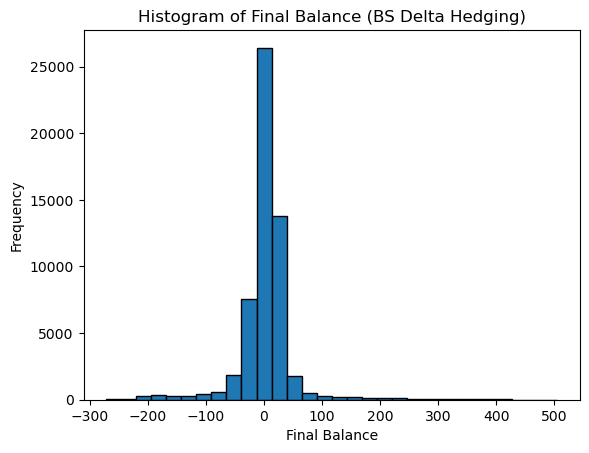

In [125]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.hist(final_balance_per_id, bins=30, edgecolor='black') 

# Adding labels and title
plt.xlabel('Final Balance')
plt.ylabel('Frequency')
plt.title('Histogram of Final Balance (BS Delta Hedging)')

# Show the plot
plt.show()

In [201]:
from tabulate import tabulate  

stats = final_balance_per_id["balance"].agg(["mean", "std"]).to_frame().T  
quantiles = final_balance_per_id["balance"].quantile([0.25, 0.5, 0.75]).to_frame().T  

quantiles.columns = ["25th Quantile", "50th Quantile", "75th Quantile"]  
stats.columns = ["Mean", "Std"]  

final_stats = pd.concat([stats, quantiles], axis=1)  

print(tabulate(final_stats, headers="keys", tablefmt="grid"))


+---------+---------+---------+-----------------+-----------------+-----------------+
|         |    Mean |     Std |   25th Quantile |   50th Quantile |   75th Quantile |
+=========+=========+=========+=================+=================+=================+
| balance | 2.73319 | 49.0882 |        -8.64091 |         5.32791 |          16.567 |
+---------+---------+---------+-----------------+-----------------+-----------------+


#### Characteristics of worst performing paths

In [183]:
# Check the worst performing path how much they lost money for the trader
final_balance_per_id.nsmallest(1000 , "balance")

,balance
id,
103307,-271.601797
103295,-271.528765
100982,-270.746838
112719,-270.535109
105604,-270.487106
98488,-270.062468
95891,-269.612529
95903,-269.502652
110458,-269.459028


In [208]:
# Create data frame where we see the evolution of the Delta Hedging strategy for each one of the worst 1,000 paths
worst_ids = final_balance_per_id.nsmallest(1000, "balance").index.unique()
df_filtered = df_call_delta_hedge_bs[df_call_delta_hedge_bs["id"].isin(worst_ids)]
df_filtered["date"] = pd.to_datetime(df_filtered["date"])
df_filtered["exdate"] = pd.to_datetime(df_filtered["exdate"])
df_filtered = df_filtered.sort_values(["id", "date"])

In [214]:
# Print the data frame
df_filtered.head(1000)

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot,id,balance
15589798,2018-12-26,2021-12-17,C,2200.0,455.0,478.8,0.184354,0.699102,0.000400,1334.861000,-47.613510,2467.7,41012,-1270.174005
15605262,2018-12-27,2021-12-17,C,2200.0,465.4,485.0,0.179037,0.711572,0.000400,1317.004000,-46.391430,2488.8,41012,-1301.209341
15620590,2018-12-28,2021-12-17,C,2200.0,465.9,487.5,0.182434,0.707852,0.000396,1324.753000,-47.032820,2485.7,41012,-1291.962537
15636194,2018-12-31,2021-12-17,C,2200.0,468.0,489.0,0.165036,0.737594,0.000412,1266.218000,-45.816440,2506.8,41012,-1366.519783
15651548,2019-01-02,2021-12-17,C,2200.0,480.2,498.0,0.171127,0.734995,0.000400,1275.945000,-47.402270,2510.0,41012,-1359.996293
15666664,2019-01-03,2021-12-17,C,2200.0,436.6,455.0,0.177808,0.698984,0.000426,1341.437000,-47.888210,2447.9,41012,-1271.844966
15681712,2019-01-04,2021-12-17,C,2200.0,498.9,521.0,0.178104,0.735321,0.000380,1280.388000,-47.456880,2531.9,41012,-1363.846616
15697014,2019-01-07,2021-12-17,C,2200.0,517.2,536.0,0.181746,0.738690,0.000366,1273.063000,-47.721790,2549.7,41012,-1372.436556
15711926,2019-01-08,2021-12-17,C,2200.0,536.8,557.5,0.181893,0.748866,0.000353,1250.113000,-47.791120,2574.4,41012,-1398.633650
15726640,2019-01-09,2021-12-17,C,2200.0,542.3,563.0,0.182748,0.749321,0.000348,1248.292000,-46.778230,2585.0,41012,-1399.809825


In [228]:
# See if the worst performing path have some things in common (like same time to maturity at inception or not)
df_first = df_filtered.sort_values("date").drop_duplicates("id", keep="first")  
df_first["date_diff_months"] = (df_first["exdate"] - df_first["date"]).dt.days / 30  

result = df_first[["id", "date", "date_diff_months"]]

,id,date,date_diff_months
12293702,66489,2017-12-20,36.466667
12293723,121386,2017-12-20,36.466667
12293721,112732,2017-12-20,36.466667
12293714,95914,2017-12-20,36.466667
12293716,100993,2017-12-20,36.466667
12293715,98507,2017-12-20,36.466667
12293707,79042,2017-12-20,36.466667
12293722,117229,2017-12-20,36.466667
12293708,81570,2017-12-20,36.466667
12293699,59149,2017-12-20,36.466667


In [232]:
# Group by year of inception to see if there is a pattern
df_first["year"] = df_first["date"].dt.year  
avg_diff_per_year = df_first.groupby("year")["date_diff_months"].mean().reset_index()  

avg_diff_per_year

,year,date_diff_months
0,2017,36.466667
1,2018,27.443902
2,2019,12.667736
3,2020,3.540019
4,2021,25.133333


In [234]:
# Group by expiry date to see if there is pattern
df_first["exp_year"] = df_first["exdate"].dt.year  
exp_counts = df_first["exp_year"].value_counts().reset_index()  
exp_counts.columns = ["exp_year", "count"]  

print(exp_counts.sort_values("exp_year"))

   exp_year  count
0      2020    825
1      2021    120
2      2022     47
3      2023      6
4      2026      2


In [193]:
# Example of bad paths, and covid crash effect
df_call_delta_hedge_bs[df_call_delta_hedge_bs.id == 117957]

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot,id,balance
19815601,25/02/2020,01/04/2020,C,3010.0,174.90,176.30,0.278725,0.683396,0.001295,348.503100,-483.82570,3128.2,117957,-1962.899367
19832557,26/02/2020,01/04/2020,C,3010.0,161.90,163.00,0.267808,0.674980,0.001388,346.173900,-474.94920,3116.4,117957,-1936.671745
19849777,27/02/2020,01/04/2020,C,3010.0,102.60,104.30,0.326510,0.476090,0.001339,361.444900,-627.30160,2978.8,117957,-1344.218213
19867951,28/02/2020,01/04/2020,C,3010.0,90.90,95.60,0.333917,0.444612,0.001330,350.507300,-643.69960,2954.2,117957,-1251.225905
19886293,02/03/2020,01/04/2020,C,3010.0,146.70,149.00,0.296154,0.636198,0.001428,331.940300,-592.40910,3090.2,117957,-1843.264962
19904361,03/03/2020,01/04/2020,C,3010.0,101.60,110.60,0.324488,0.507521,0.001450,337.260300,-685.05910,3003.4,117957,-1456.796461
19922669,04/03/2020,01/04/2020,C,3010.0,172.70,174.50,0.304907,0.691476,0.001329,304.542900,-595.34160,3130.1,117957,-2032.594006
19940685,05/03/2020,01/04/2020,C,3010.0,121.60,123.60,0.354453,0.536746,0.001361,326.342000,-775.25820,3023.9,117957,-1564.705959
19959041,06/03/2020,01/04/2020,C,3010.0,91.80,94.80,0.350136,0.463622,0.001429,314.904500,-768.79800,2972.4,117957,-1347.352181
19977119,09/03/2020,01/04/2020,C,3010.0,26.30,28.30,0.395000,0.190504,0.000998,187.346000,-585.78350,2746.6,117957,-597.206283


### Heston Model

#### Focus on one particular date at the beginning

In [325]:
# Transform dates to date objects
df_call["date"] = pd.to_datetime(df_call["date"], dayfirst=True)
df_call["exdate"] = pd.to_datetime(df_call["exdate"], dayfirst=True)

In [271]:
# See how many different expiration dates we have for one particular date
(df_call[df_call.date == "2015-11-12"]["exdate"] - df_call[df_call.date == "2015-11-12"]["date"]).unique()

<TimedeltaArray>
[  '8 days',  '37 days',  '64 days',  '99 days', '127 days', '218 days',
 '309 days', '400 days', '435 days', '582 days', '764 days',   '1 days',
  '15 days',  '18 days',  '22 days',  '29 days',  '42 days',  '49 days',
  '57 days',  '71 days',  '78 days',  '85 days',  '92 days', '109 days',
 '140 days', '169 days', '231 days', '323 days']
Length: 28, dtype: timedelta64[ns]

In [327]:
# Print df_call data frame on one particular date
df_call[df_call.date == "2015-11-12"]

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot,id
7822685,2015-11-12,2015-11-20,C,2020.0,33.9,37.9,0.186144,0.689283,0.006691,99.98348,-458.87440,2046.0,27630
7822686,2015-11-12,2015-11-20,C,2025.0,30.2,34.2,0.182448,0.657458,0.007103,104.04210,-469.76590,2046.0,27988
7822687,2015-11-12,2015-11-20,C,2030.0,26.8,30.4,0.178269,0.623482,0.007512,107.51250,-475.86090,2046.0,28337
7822688,2015-11-12,2015-11-20,C,2035.0,23.6,26.8,0.174420,0.586778,0.007877,110.29300,-479.12260,2046.0,28565
7822689,2015-11-12,2015-11-20,C,2040.0,21.2,23.7,0.174757,0.546783,0.007998,112.20600,-490.33650,2046.0,28818
7822690,2015-11-12,2015-11-20,C,2045.0,18.2,20.5,0.170209,0.506480,0.008268,112.97510,-481.98660,2046.0,29056
7822691,2015-11-12,2015-11-20,C,2050.0,15.2,17.8,0.166060,0.464116,0.008442,112.53810,-469.49510,2046.0,29597
7822692,2015-11-12,2015-11-20,C,2055.0,11.9,14.9,0.157672,0.417787,0.008737,110.59260,-438.65990,2046.0,30000
7822693,2015-11-12,2015-11-20,C,2060.0,10.5,11.3,0.152449,0.370525,0.008743,107.00010,-411.12700,2046.0,30268
7822694,2015-11-12,2015-11-20,C,2065.0,7.6,10.3,0.150074,0.325406,0.008467,102.00560,-386.68520,2046.0,30518


In [377]:
df_test = df_call[df_call.date.isin(df_call.date.unique()[:1])]

In [379]:
# Create data frame for parameters
df_param = pd.DataFrame()
df_param["spot"] = df_test["spot"]
df_param["time_to_expiry"] = (df_test["exdate"] - df_test["date"]).dt.days / 365
df_param["strike"] = df_test["strike_price"]
df_param["call"] = df_test["best_bid"]
df_param["impl_vol"] = df_test["impl_volatility"]
df_param["rate"] = 0.01

In [381]:
df_param

,spot,time_to_expiry,strike,call,impl_vol,rate
7822685,2046.0,0.021918,2020.0,33.9,0.186144,0.01
7822686,2046.0,0.021918,2025.0,30.2,0.182448,0.01
7822687,2046.0,0.021918,2030.0,26.8,0.178269,0.01
7822688,2046.0,0.021918,2035.0,23.6,0.174420,0.01
7822689,2046.0,0.021918,2040.0,21.2,0.174757,0.01
7822690,2046.0,0.021918,2045.0,18.2,0.170209,0.01
7822691,2046.0,0.021918,2050.0,15.2,0.166060,0.01
7822692,2046.0,0.021918,2055.0,11.9,0.157672,0.01
7822693,2046.0,0.021918,2060.0,10.5,0.152449,0.01
7822694,2046.0,0.021918,2065.0,7.6,0.150074,0.01


#### Show the volatility smile and volatility term structure (We should also incorporate puts)

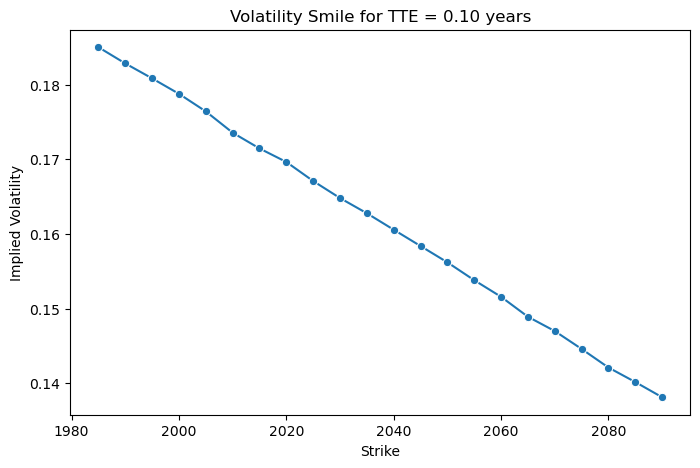

In [366]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select another maturity (e.g., second unique value in time_to_expiry)
alternative_maturity = df_param["time_to_expiry"].unique()[1]  # Change index to pick another one
df_alt_maturity = df_param[df_param["time_to_expiry"] == alternative_maturity]

plt.figure(figsize=(8, 5))
sns.lineplot(data=df_alt_maturity, x="strike", y="impl_vol", marker="o")
plt.xlabel("Strike")
plt.ylabel("Implied Volatility")
plt.title(f"Volatility Smile for TTE = {alternative_maturity:.2f} years")
plt.show()


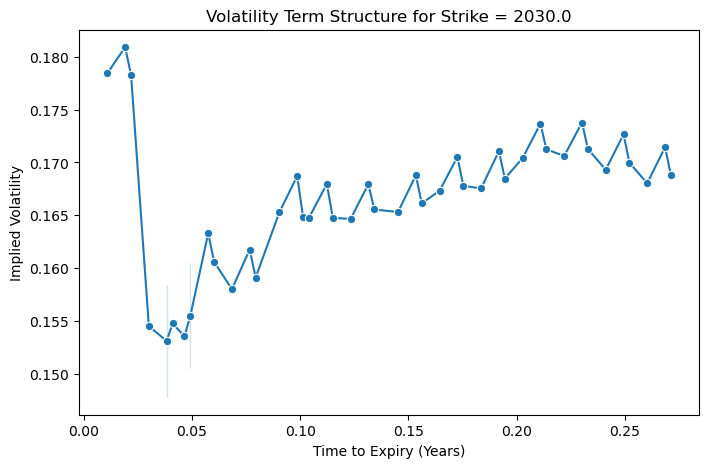

In [368]:
# Select a fixed strike (e.g., ATM strike)
atm_strike = df_param["strike"].median()
df_fixed_strike = df_param[df_param["strike"] == atm_strike]

plt.figure(figsize=(8, 5))
sns.lineplot(data=df_fixed_strike, x="time_to_expiry", y="impl_vol", marker="o")
plt.xlabel("Time to Expiry (Years)")
plt.ylabel("Implied Volatility")
plt.title(f"Volatility Term Structure for Strike = {atm_strike}")
plt.show()


#### Calibrate Heston model based on the above example

In [371]:
df_param.head()

,spot,time_to_expiry,strike,call,impl_vol,rate
7822685,2046.0,0.021918,2020.0,33.9,0.186144,0.01
7822686,2046.0,0.021918,2025.0,30.2,0.182448,0.01
7822687,2046.0,0.021918,2030.0,26.8,0.178269,0.01
7822688,2046.0,0.021918,2035.0,23.6,0.174420,0.01
7822689,2046.0,0.021918,2040.0,21.2,0.174757,0.01


In [512]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from scipy.stats import norm

# Heston model characteristic function
def heston_cf(params, u, T, S0, r):
    kappa, theta, sigma, rho, v0 = params
    i = 1j
    d = np.sqrt((rho * sigma * u * i - kappa) ** 2 + (sigma ** 2) * (u * i + u ** 2))
    g = np.where(np.abs(kappa - rho * sigma * u * i + d) > 1e-8,
                 (kappa - rho * sigma * u * i - d) / (np.maximum(1e-8, kappa - rho * sigma * u * i + d)),
                 0)
    C = r * u * i * T + (kappa * theta / (sigma ** 2)) * (
        (kappa - rho * sigma * u * i - d) * T - 2 * np.log(np.maximum(1e-8, (1 - g * np.exp(-d * T)) / (1 - g)))
    )
    D = ((kappa - rho * sigma * u * i - d) / (sigma ** 2)) * ((1 - np.exp(-d * T)) / np.maximum(1e-8, (1 - g * np.exp(-d * T))))
    return np.exp(C + D * v0 + u * i * np.log(S0))

# Heston model price calculation using Gauss-Legendre quadrature
def heston_price(params, K, T, S0, r):
    x, w = np.polynomial.legendre.leggauss(32)  # 32-point quadrature
    
    def integrand(u, phi_offset):
        if np.abs(u) <= 1e-6:
            return 0
        cf = heston_cf(params, u - 1j * phi_offset, T, S0, r)
        numerator = np.exp(-1j * u * np.log(K)) * cf
        denominator = 1j * u * heston_cf(params, -1j * phi_offset, T, S0, r)
        return (numerator / denominator).real
    
    u_vals = 10 * (x + 1) / 2  # Adjusted upper bound for better accuracy
    integrals_P1 = np.array([integrand(u, 1) for u in u_vals])
    integrals_P2 = np.array([integrand(u, 0) for u in u_vals])
    
    P1 = np.clip(0.5 + (1 / np.pi) * np.sum(w * integrals_P1 * 10 / 2), 0, 1)
    P2 = np.clip(0.5 + (1 / np.pi) * np.sum(w * integrals_P2 * 10 / 2), 0, 1)
    
    return np.exp(-r * T) * (S0 * P1 - K * P2)

# Objective function for calibration
def objective(params, strikes, expiries, spots, rates, market_prices):
    model_prices = np.array([heston_price(params, K, T, S, r) for K, T, S, r in zip(strikes, expiries, spots, rates)])
    return np.sum((market_prices - model_prices) ** 2)

# Initial parameter guess and bounds
initial_params = [2.0, 0.02, 0.3, -0.5, 0.02]
bounds = [(0.01, 10), (0.001, 0.1), (0.01, 1), (-1, 1), (0.001, 0.1)]

# Sampling data for calibration
df_param_sampled = df_param.sample(n=10, random_state=42)
strikes = df_param_sampled["strike"].values
expiries = df_param_sampled["time_to_expiry"].values
spots = df_param_sampled["spot"].values
rates = df_param_sampled["rate"].values
market_prices = df_param_sampled["call"].values

# Optimization
result = opt.minimize(objective, initial_params, args=(strikes, expiries, spots, rates, market_prices), bounds=bounds, method='L-BFGS-B')
calibrated_params = result.x

# Compute Heston prices using calibrated parameters
df_param_sampled["heston_price"] = df_param_sampled.apply(
    lambda row: heston_price(calibrated_params, row["strike"], row["time_to_expiry"], row["spot"], row["rate"]), axis=1
)

print("Calibrated Parameters:", calibrated_params)
print(df_param_sampled[["strike", "time_to_expiry", "call", "heston_price"]])

Calibrated Parameters: [ 8.71439292  0.03200378  1.         -1.          0.09353355]
         strike  time_to_expiry   call  heston_price
7828386  1995.0        0.156164   82.2     80.774933
7829151  2095.0        0.213699   32.1     32.293685
7822691  2050.0        0.021918   15.2     10.045425
7827574  2090.0        0.115068   18.9     20.692525
7824064  2080.0        0.271233   44.7     45.776311
7827989  2075.0        0.134247   28.8     30.892797
7830730  2175.0        0.884932   58.0     57.678474
7830598  2025.0        0.632877  114.6    114.120762
7824651  2175.0        0.846575   54.1     54.641887
7829862  1975.0        0.252055  110.0    108.682032


In [514]:
df_call.head()

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta,spot,id
7822685,2015-11-12,2015-11-20,C,2020.0,33.9,37.9,0.186144,0.689283,0.006691,99.98348,-458.8744,2046.0,27630
7822686,2015-11-12,2015-11-20,C,2025.0,30.2,34.2,0.182448,0.657458,0.007103,104.04210,-469.7659,2046.0,27988
7822687,2015-11-12,2015-11-20,C,2030.0,26.8,30.4,0.178269,0.623482,0.007512,107.51250,-475.8609,2046.0,28337
7822688,2015-11-12,2015-11-20,C,2035.0,23.6,26.8,0.174420,0.586778,0.007877,110.29300,-479.1226,2046.0,28565
7822689,2015-11-12,2015-11-20,C,2040.0,21.2,23.7,0.174757,0.546783,0.007998,112.20600,-490.3365,2046.0,28818


In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from scipy.stats import norm
from multiprocessing import Pool

# Heston model characteristic function
def heston_cf(params, u, T, S0, r):
    kappa, theta, sigma, rho, v0 = params
    i = 1j
    d = np.sqrt((rho * sigma * u * i - kappa) ** 2 + (sigma ** 2) * (u * i + u ** 2))
    g = (kappa - rho * sigma * u * i - d) / (kappa - rho * sigma * u * i + d)
    C = r * u * i * T + (kappa * theta / (sigma ** 2)) * (
        (kappa - rho * sigma * u * i - d) * T - 2 * np.log((1 - g * np.exp(-d * T)) / (1 - g))
    )
    D = ((kappa - rho * sigma * u * i - d) / (sigma ** 2)) * ((1 - np.exp(-d * T)) / (1 - g * np.exp(-d * T)))
    return np.exp(C + D * v0 + u * i * np.log(S0))

# Heston model price calculation using Gauss-Legendre quadrature
def heston_price(params, K, T, S0, r):
    x, w = np.polynomial.legendre.leggauss(32)
    def integrand(u, phi_offset):
        if np.abs(u) <= 1e-6:
            return 0
        cf = heston_cf(params, u - 1j * phi_offset, T, S0, r)
        numerator = np.exp(-1j * u * np.log(K)) * cf
        denominator = 1j * u * heston_cf(params, -1j * phi_offset, T, S0, r)
        return (numerator / denominator).real
    
    u_vals = 10 * (x + 1) / 2
    integrals_P1 = np.array([integrand(u, 1) for u in u_vals])
    integrals_P2 = np.array([integrand(u, 0) for u in u_vals])
    
    P1 = np.clip(0.5 + (1 / np.pi) * np.sum(w * integrals_P1 * 10 / 2), 0, 1)
    P2 = np.clip(0.5 + (1 / np.pi) * np.sum(w * integrals_P2 * 10 / 2), 0, 1)
    
    return np.exp(-r * T) * (S0 * P1 - K * P2)

# Objective function for calibration
def objective(params, strikes, expiries, spots, rates, market_prices):
    model_prices = np.array([heston_price(params, K, T, S, r) for K, T, S, r in zip(strikes, expiries, spots, rates)])
    return np.sum((market_prices - model_prices) ** 2)

# Initial parameter guess and bounds
initial_params = [2.0, 0.02, 0.3, -0.5, 0.02]
bounds = [(0.01, 10), (0.001, 0.1), (0.01, 1), (-1, 1), (0.001, 0.1)]

# Compute time to expiry
df_call["time_to_expiry"] = (pd.to_datetime(df_call["exdate"]) - pd.to_datetime(df_call["date"])).dt.days / 252

# Sample first month of data
first_month = df_call["date"].min()
dates_sampled = df_call[df_call["date"] <= first_month + pd.Timedelta(days=30)]["date"].unique()

# Parallelized calibration
def calibrate_on_date(current_date):
    df_param_sampled = df_call[df_call["date"] == current_date].sample(n=100, random_state=42)
    strikes = df_param_sampled["strike_price"].values
    expiries = df_param_sampled["time_to_expiry"].values
    spots = df_param_sampled["spot"].values
    rates = np.full_like(spots, 0.05)
    market_prices = ((df_param_sampled["best_bid"] + df_param_sampled["best_offer"]) / 2).values
    
    result = opt.minimize(objective, initial_params, args=(strikes, expiries, spots, rates, market_prices), bounds=bounds, method='L-BFGS-B')
    calibrated_params = result.x
    
    df_call.loc[df_call["date"] == current_date, "heston_price"] = df_param_sampled.apply(
        lambda row: heston_price(calibrated_params, row["strike_price"], row["time_to_expiry"], row["spot"], 0.05), axis=1
    )
    
    return current_date, calibrated_params

with Pool(processes=4) as pool:
    results = pool.map(calibrate_on_date, dates_sampled)

print("Calibrated Parameters per Sampled Date:")
for date, params in results:
    print(f"Date: {date}, Params: {params}")

print(df_call[["date", "strike_price", "time_to_expiry", "best_bid", "best_offer", "heston_price"]])


NameError: name 'df_call' is not defined